# Tarea de Clasificación Multiclase
## - Clasificación de Cardiopatías en base a Electrocardiogramas (ECGs)

Este conjunto de datos se compone de dos colecciones de señales de latido derivadas de dos conjuntos de datos famosos en la clasificación de latidos, el conjunto de datos de arritmias [KAGGLE](https://www.kaggle.com/shayanfazeli/heartbeat). La cantidad de muestras en ambas colecciones es lo suficientemente grande para entrenar una red neuronal profunda.

Este conjunto de datos se ha utilizado para explorar la clasificación de latidos utilizando arquitecturas de redes neuronales profundas y observar algunas de las capacidades de transferencia de aprendizaje en él.

Las señales corresponden a formas de latidos cardíacos de electrocardiograma (ECG) para el caso normal y los casos afectados por diferentes arritmias e infarto de miocardio. Estas señales se preprocesan y segmentan, y cada segmento corresponde a un latido.

In [1]:
%pip install matplotlib tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
                                              0.0/276.5 MB ? eta -:--:--
                                              0.0/276.5 MB ? eta -:--:--
                                              0.0/276.5 MB ? eta -:--:--
                                              0.0/276.5 MB ? eta -:--:--
                                              0.0/276.5 MB ? eta -:--:--
                                            0.0/276.5 MB 217.9 kB/s eta 0:21:09
                                            0.0/276.5 MB 217.9 kB/s eta 0:21:09
                                            0.0/276.5 MB 163.4 kB/s eta 0:28:12
                                            0.0/276.5 MB 163.4 kB/s eta 0:28:12
                                            0.1/276.5 MB 192.5 kB/s eta 0:23:57
                                            0.1/276.5 MB 186.7 kB/s eta 0:24:41
       

In [2]:
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Training verbosity
VERBOSE = 1

# Google Colab
COLAB = False

# TB callbacks
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
TBLOGDIRS = {'mitbih': 'logs/mitbih/tb_'}
TBLOGDIRS = {k:v+current_time for (k,v) in TBLOGDIRS.items()}
tensorboard = TensorBoard(TBLOGDIRS['mitbih'], histogram_freq = 1)

## Carga de datos

In [4]:
data_train = pd.read_csv('mitbih_train.csv')
data_test = pd.read_csv('mitbih_test.csv')

In [5]:
#data_train = pd.read_parquet('mitbih_train.parquet')
#data_test = pd.read_parquet('mitbih_test.parquet')

In [6]:
#data_train.head()

In [7]:
#data_test.tail()

In [8]:
X_train = data_train.iloc[:,:187]
X_test = data_test.iloc[:, :187]

In [9]:
Y_train = data_train.iloc[:,187]
Y_test = data_test.iloc[:,187]

In [10]:
classes = np.unique(Y_train)
nclasses = len(classes)

In [11]:
list(classes)

[0.0, 1.0, 2.0, 3.0, 4.0]

## Pequeño analisis exploratorio de la distribución de las clases

(array([0.82772721, 0.02539033, 0.06610853, 0.00732128, 0.07345265]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

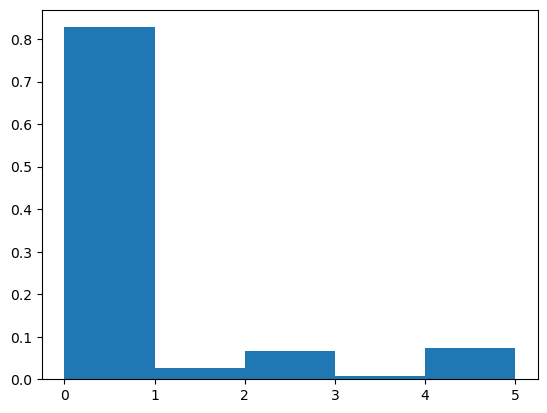

In [13]:
plt.hist(Y_train, bins=np.arange(Y_train.min(), Y_train.max()+2), density = True)

In [14]:
print(Y_train.value_counts())

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64


## One-Hot Encoding con Keras

In [15]:
Y_train = keras.utils.to_categorical(Y_train, nclasses)
Y_test = keras.utils.to_categorical(Y_test, nclasses)

In [16]:
Y_train[:2]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [17]:
Y_train.shape

(87553, 5)

In [18]:
Y_test.shape

(21891, 5)

## Partición de Train dataset en Train (SubTrain) y Validation datasets

In [19]:
X_train, X_val, Y_train , Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

## Construcción de red neuronal con arquitectura feedforward sencilla (2 capas)

In [20]:
input_dim = X_train.shape[1]

In [21]:
input_dim

187

In [22]:
model = Sequential()
model.add(Dense(64, input_shape = (input_dim,), activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12032     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 12357 (48.27 KB)
Trainable params: 12357 (48.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
keras.utils.plot_model(model, show_shapes= True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Definición de:
- ### Hiperparametros de entrenamiento (Learning Rate, Loss Function, Optimizer, Batch Size, Epochs)
- ### Métrica objetivo (accuracy?)

In [25]:
learn_rate = .001
opt = Adam(learning_rate= learn_rate)

In [26]:
model.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
batch_size = 10
epochs = 10

## Entrenamiento

In [28]:
training_history = model.fit(X_train,Y_train,
                            validation_data = (X_val,Y_val),
                            batch_size = batch_size,
                            epochs = epochs,
                            callbacks = TensorBoard(TBLOGDIRS['mitbih'], histogram_freq=1),
                            verbose = VERBOSE)

Epoch 1/10
7005/7005 [==============================] - 31s 4ms/step - loss: 0.2666 - accuracy: 0.9260 - val_loss: 0.1939 - val_accuracy: 0.9451
Epoch 2/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.1772 - accuracy: 0.9513 - val_loss: 0.1578 - val_accuracy: 0.9547
Epoch 3/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.1522 - accuracy: 0.9573 - val_loss: 0.1430 - val_accuracy: 0.9612
Epoch 4/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.1360 - accuracy: 0.9620 - val_loss: 0.1366 - val_accuracy: 0.9620
Epoch 5/10
7005/7005 [==============================] - 27s 4ms/step - loss: 0.1253 - accuracy: 0.9647 - val_loss: 0.1312 - val_accuracy: 0.9634
Epoch 6/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.1174 - accuracy: 0.9668 - val_loss: 0.1340 - val_accuracy: 0.9633
Epoch 7/10
7005/7005 [==============================] - 21s 3ms/step - loss: 0.1120 - accuracy: 0.9688 - val_loss: 0.1238 - val_ac

In [29]:
y_pseudo_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pseudo_probabilities, axis = 1)
y_test = np.argmax(Y_test, axis = 1)

685/685 [==============================] - 1s 2ms/step


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18117
           1       0.84      0.61      0.71       556
           2       0.92      0.90      0.91      1448
           3       0.76      0.57      0.65       162
           4       0.99      0.94      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.90      0.80      0.84     21891
weighted avg       0.97      0.97      0.97     21891



## Evaluacion del modelo

In [31]:
# %pip install seaborn

In [32]:
from utils import eval_model

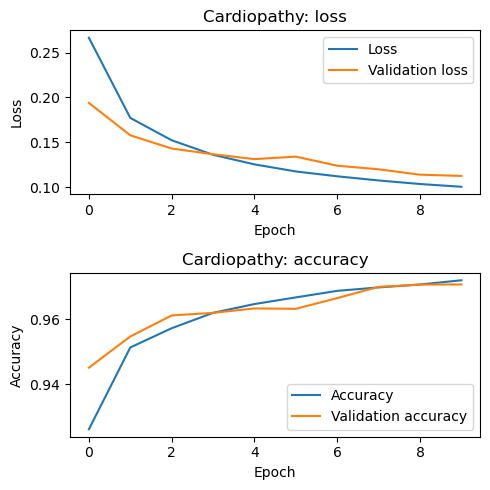

685/685 [==============================] - 1s 2ms/step


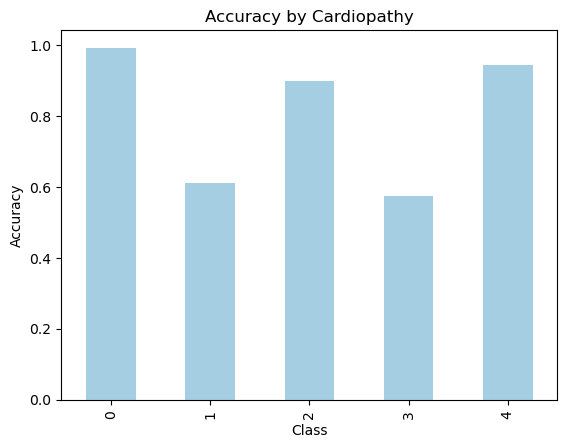

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18117
           1       0.84      0.61      0.71       556
           2       0.92      0.90      0.91      1448
           3       0.76      0.57      0.65       162
           4       0.99      0.94      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.90      0.80      0.84     21891
weighted avg       0.97      0.97      0.97     21891

Confusion matrix
[[17974    57    65     8    13]
 [  204   340    10     0     2]
 [  114     6  1301    21     6]
 [   50     0    19    93     0]
 [   70     1    18     1  1518]]


Loss function: 0.11667217314243317, accuracy: 0.9696221947669983


In [33]:
eval_model(training_history, model, X_test, Y_test, 'Cardiopathy')

# Tarea

### Ejercicio 1. Implemente y evalue una red de 3 capas utilizando la técnica de regularización dropout

In [34]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (input_dim,), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nclasses, activation='sigmoid'))

In [35]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                12032     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 645       
                                                                 
Total params: 20997 (82.02 KB)
Trainable params: 20997 (82.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
learn_rate = .001
opt = Adam(learning_rate= learn_rate)

model2.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
batch_size = 10
epochs = 10

training_history = model2.fit(X_train,Y_train,
                            validation_data = (X_val,Y_val),
                            batch_size = batch_size,
                            epochs = epochs,
                            callbacks = TensorBoard(TBLOGDIRS['mitbih'], histogram_freq=1),
                            verbose = VERBOSE)

Epoch 1/10
7005/7005 [==============================] - 25s 3ms/step - loss: 0.3724 - accuracy: 0.8967 - val_loss: 0.2338 - val_accuracy: 0.9268
Epoch 2/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.2828 - accuracy: 0.9199 - val_loss: 0.2108 - val_accuracy: 0.9404
Epoch 3/10
7005/7005 [==============================] - 18s 3ms/step - loss: 0.2585 - accuracy: 0.9265 - val_loss: 0.1938 - val_accuracy: 0.9460
Epoch 4/10
7005/7005 [==============================] - 18s 3ms/step - loss: 0.2467 - accuracy: 0.9301 - val_loss: 0.1715 - val_accuracy: 0.9514
Epoch 5/10
7005/7005 [==============================] - 23s 3ms/step - loss: 0.2351 - accuracy: 0.9335 - val_loss: 0.1720 - val_accuracy: 0.9515
Epoch 6/10
7005/7005 [==============================] - 22s 3ms/step - loss: 0.2291 - accuracy: 0.9350 - val_loss: 0.1671 - val_accuracy: 0.9507
Epoch 7/10
7005/7005 [==============================] - 20s 3ms/step - loss: 0.2223 - accuracy: 0.9364 - val_loss: 0.1636 - val_ac

In [38]:
y_pseudo_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pseudo_probabilities, axis = 1)
y_test = np.argmax(Y_test, axis = 1)

685/685 [==============================] - 1s 2ms/step


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18117
           1       0.84      0.61      0.71       556
           2       0.92      0.90      0.91      1448
           3       0.76      0.57      0.65       162
           4       0.99      0.94      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.90      0.80      0.84     21891
weighted avg       0.97      0.97      0.97     21891



In [40]:
from utils import eval_model

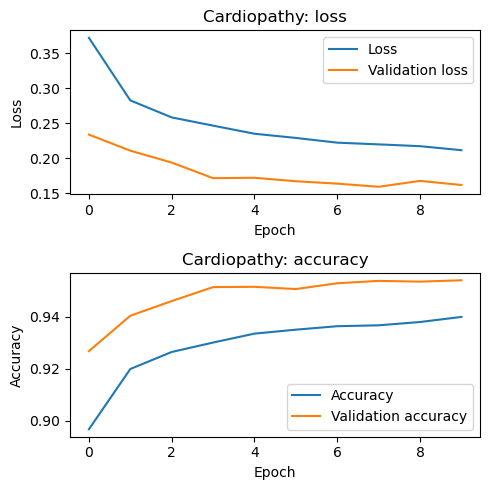

685/685 [==============================] - 1s 2ms/step


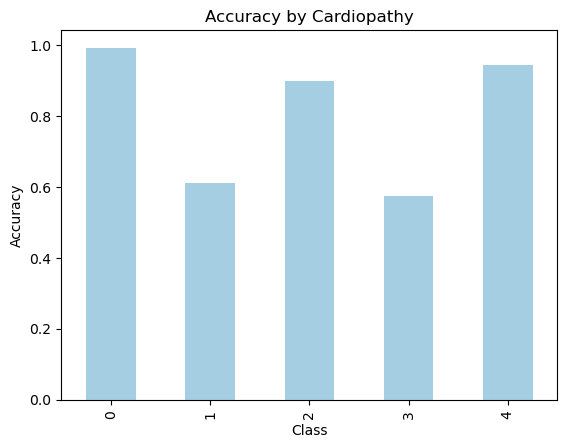

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18117
           1       0.84      0.61      0.71       556
           2       0.92      0.90      0.91      1448
           3       0.76      0.57      0.65       162
           4       0.99      0.94      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.90      0.80      0.84     21891
weighted avg       0.97      0.97      0.97     21891

Confusion matrix
[[17974    57    65     8    13]
 [  204   340    10     0     2]
 [  114     6  1301    21     6]
 [   50     0    19    93     0]
 [   70     1    18     1  1518]]


Loss function: 0.11667217314243317, accuracy: 0.9696221947669983


In [41]:
eval_model(training_history, model, X_test, Y_test, 'Cardiopathy')

### Ejercicio 2. Implemente y evalue una red de 6 capas utilizando la técnica de regularización Early Stopping de 1 Fase

In [42]:
model3 = Sequential()
model3.add(Dense(64, input_shape = (input_dim,), activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(nclasses, activation='softmax'))

learn_rate = .001
opt = Adam(learning_rate= learn_rate)

callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model3.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

training_history = model3.fit(X_train,Y_train,
                            validation_data = (X_val,Y_val),
                            batch_size = batch_size,
                            epochs = epochs,
                            callbacks = [callback_early_stopping,TensorBoard(TBLOGDIRS['mitbih'], histogram_freq=1)],
                            verbose = VERBOSE)

Epoch 1/10
7005/7005 [==============================] - 65s 9ms/step - loss: 0.2409 - accuracy: 0.9351 - val_loss: 0.1928 - val_accuracy: 0.9444
Epoch 2/10
7005/7005 [==============================] - 60s 9ms/step - loss: 0.1599 - accuracy: 0.9559 - val_loss: 0.1378 - val_accuracy: 0.9640
Epoch 3/10
7005/7005 [==============================] - 210s 30ms/step - loss: 0.1361 - accuracy: 0.9626 - val_loss: 0.1374 - val_accuracy: 0.9649
Epoch 4/10
7005/7005 [==============================] - 61s 9ms/step - loss: 0.1236 - accuracy: 0.9659 - val_loss: 0.1255 - val_accuracy: 0.9680
Epoch 5/10
7005/7005 [==============================] - 83s 12ms/step - loss: 0.1137 - accuracy: 0.9685 - val_loss: 0.1229 - val_accuracy: 0.9685
Epoch 6/10
7005/7005 [==============================] - 109s 16ms/step - loss: 0.1085 - accuracy: 0.9697 - val_loss: 0.1289 - val_accuracy: 0.9648
Epoch 7/10
7005/7005 [==============================] - 108s 15ms/step - loss: 0.1070 - accuracy: 0.9701 - val_loss: 0.1137 -

685/685 [==============================] - 5s 6ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18117
           1       0.96      0.45      0.61       556
           2       0.93      0.88      0.91      1448
           3       0.69      0.77      0.73       162
           4       0.99      0.93      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.91      0.80      0.84     21891
weighted avg       0.97      0.97      0.96     21891



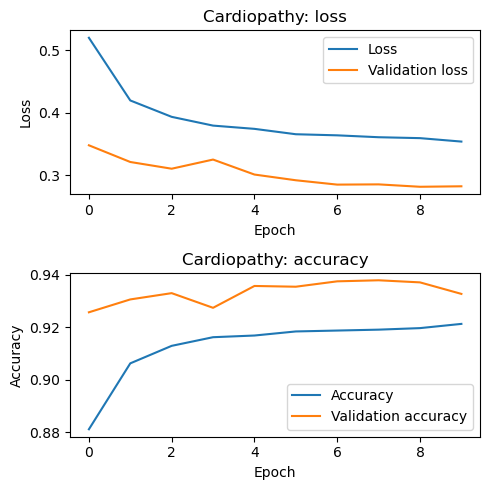

685/685 [==============================] - 5s 7ms/step


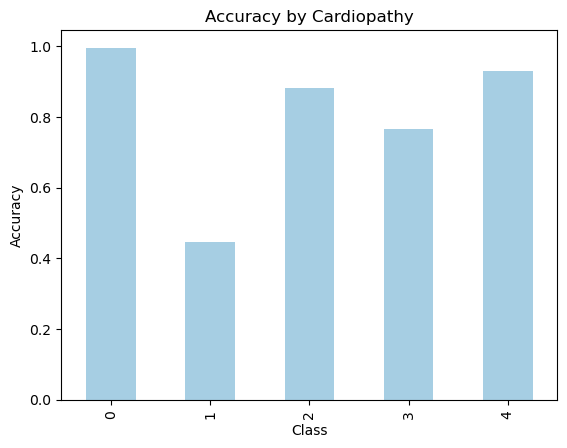

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18117
           1       0.96      0.45      0.61       556
           2       0.93      0.88      0.91      1448
           3       0.69      0.77      0.73       162
           4       0.99      0.93      0.96      1608

    accuracy                           0.97     21891
   macro avg       0.91      0.80      0.84     21891
weighted avg       0.97      0.97      0.96     21891

Confusion matrix
[[18034     6    59    13     5]
 [  295   248    12     0     1]
 [  118     3  1277    42     8]
 [   35     0     3   124     0]
 [   96     1    16     0  1495]]


Loss function: 0.14084725081920624, accuracy: 0.967429518699646


In [45]:
y_pseudo_probabilities = model3.predict(X_test)
y_pred = np.argmax(y_pseudo_probabilities, axis = 1)
y_test = np.argmax(Y_test, axis = 1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from utils import eval_model
eval_model(training_history, model3, X_test, Y_test, 'Cardiopathy')

In [43]:
%load_ext tensorboard

### Ejercicio 3. Pongase creativo e implemente y evalue una red neuronal a gusto, que utilice al menos 2 técnicas vistas en el teórico

In [44]:
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2

reg_strength = 0.0001

model4 = Sequential()
model4.add(Dense(64, input_shape=(input_dim,), activation='relu', kernel_regularizer=l2(reg_strength)))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_strength)))
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu', kernel_regularizer=l2(reg_strength)))
model4.add(Dropout(0.5))
model4.add(Dense(512, activation='relu', kernel_regularizer=l2(reg_strength)))
model4.add(Dropout(0.5))
model4.add(Dense(1024, activation='relu', kernel_regularizer=l2(reg_strength)))
model4.add(Dropout(0.5))
model4.add(Dense(nclasses, activation='softmax'))

learn_rate = .001
opt = Adam(learning_rate= learn_rate)

callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model4.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

training_history = model4.fit(X_train,Y_train,
                              validation_data=(X_val,Y_val),
                              batch_size=batch_size,
                              epochs=epochs,
                              callbacks=[callback_early_stopping, TensorBoard(TBLOGDIRS['mitbih'], histogram_freq=1)],
                              verbose=VERBOSE)

Epoch 1/10
7005/7005 [==============================] - 124s 17ms/step - loss: 0.5204 - accuracy: 0.8810 - val_loss: 0.3479 - val_accuracy: 0.9257
Epoch 2/10
7005/7005 [==============================] - 125s 18ms/step - loss: 0.4199 - accuracy: 0.9062 - val_loss: 0.3211 - val_accuracy: 0.9306
Epoch 3/10
7005/7005 [==============================] - 109s 16ms/step - loss: 0.3936 - accuracy: 0.9129 - val_loss: 0.3104 - val_accuracy: 0.9330
Epoch 4/10
7005/7005 [==============================] - 124s 18ms/step - loss: 0.3795 - accuracy: 0.9162 - val_loss: 0.3251 - val_accuracy: 0.9274
Epoch 5/10
7005/7005 [==============================] - 122s 17ms/step - loss: 0.3743 - accuracy: 0.9168 - val_loss: 0.3010 - val_accuracy: 0.9358
Epoch 6/10
7005/7005 [==============================] - 122s 17ms/step - loss: 0.3657 - accuracy: 0.9184 - val_loss: 0.2918 - val_accuracy: 0.9355
Epoch 7/10
7005/7005 [==============================] - 138s 20ms/step - loss: 0.3639 - accuracy: 0.9187 - val_loss: 0

685/685 [==============================] - 4s 6ms/step


c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18117
           1       0.00      0.00      0.00       556
           2       0.94      0.62      0.75      1448
           3       0.00      0.00      0.00       162
           4       0.99      0.85      0.91      1608

    accuracy                           0.93     21891
   macro avg       0.57      0.49      0.52     21891
weighted avg       0.90      0.93      0.91     21891



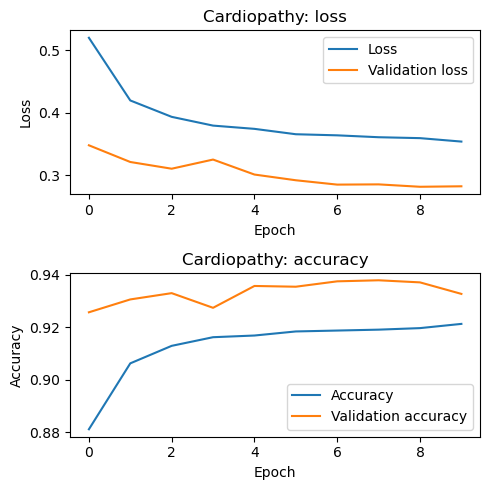

685/685 [==============================] - 5s 7ms/step


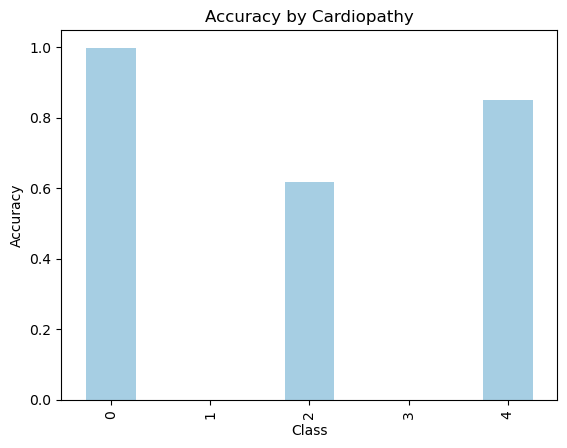

Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18117
           1       0.00      0.00      0.00       556
           2       0.94      0.62      0.75      1448
           3       0.00      0.00      0.00       162
           4       0.99      0.85      0.91      1608

    accuracy                           0.93     21891
   macro avg       0.57      0.49      0.52     21891
weighted avg       0.90      0.93      0.91     21891

Confusion matrix
[[18093     0    20     0     4]
 [  540     0    16     0     0]
 [  543     0   896     0     9]
 [  145     0    17     0     0]
 [  239     0     2     0  1367]]




c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\scruple077\anaconda3\envs\AI-ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss function: 0.28885966539382935, accuracy: 0.9298798441886902


In [46]:
y_pseudo_probabilities = model4.predict(X_test)
y_pred = np.argmax(y_pseudo_probabilities, axis = 1)
y_test = np.argmax(Y_test, axis = 1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from utils import eval_model
eval_model(training_history, model4, X_test, Y_test, 'Cardiopathy')

### Ejercicio 4. Desarrolle en lenguaje natural, un texto describiendo las arquitecturas utilizadas, cual considera que dio mejor resultado y porque.

#### Primer modelo

1. Arquitectura del primer modelo (model2):

Esta arquitectura consta de tres capas densas. 
- 64 unidades con una función de activación ReLU
- Capa de dropout del 50%. 
- 128 unidades con una función de activación ReLU 
- Capa de dropout del 50%. 
- La última capa tiene un número de unidades igual a "nclasses" y utiliza la función de activación sigmoidal.

#### Segundo Modelo

Este modelo presenta una estructura más profunda con cinco capas densas:

- 64 neuronas con función de activación ReLU.
- 128 neuronas con función de activación ReLU.
- 256 neuronas con función de activación ReLU.
- 512 neuronas con función de activación ReLU.
- 1024 neuronas con función de activación ReLU.
- Número de clases neuronas con función de activación softmax.

Tercer Modelo

Este modelo presenta una estructura más profunda con cinco capas densas y regularizacion aplicada (dropout y Regularizacion L2):

- 64 neuronas con función de activación ReLU.  Regularizacion L2
- Dropout del 50&
- 128 neuronas con función de activación ReLU. Regularizacion L2
- Dropout del 50&
- 256 neuronas con función de activación ReLU. Regularizacion L2
- Dropout del 50&
- 512 neuronas con función de activación ReLU. Regularizacion L2
- Dropout del 50&
- 1024 neuronas con función de activación ReLU. Regularizacion L2
- Dropout del 50&
- Número de clases neuronas con función de activación softmax.

Ambos modelos han alcanzado una precisión cercana al 97% en el train. Sin embargo, al analizar en detalle, la Arquitectura 2, aunque sea más profunda, ha demostrado tener un mejor rendimiento en la clasificación de algunas categorías, evidenciado en métricas como el recall y la precisión para las clases individualmente. La Arquitectura 3 tiene quizas demasiada regulrizacion por lo que su rendimiento baja en comparación a las otras. 